# Reading and Writing Audio Files with ewave

[back to overview page](index.ipynb)

https://github.com/melizalab/py-ewave

Advantages:

* "pure Python" (plus NumPy!)
* floating-point files can be used
* WAVEX is supported
* files can be read partially
* uses [numpy.memmap](http://docs.scipy.org/doc/numpy/reference/generated/numpy.memmap.html)

Disadvantages:

* no 24-bit PCM
* function for rescaling has to be invoked separately (but at least it's available)

Installation:

    python3 -m pip install ewave

## Reading

In [1]:
import ewave

In [2]:
with ewave.open('data/test_wav_pcm16.wav') as w:
    print("samplerate = {0.sampling_rate} Hz, length = {0.nframes} samples, "
          "channels = {0.nchannels}, dtype = {0.dtype!r}".format(w))
    data = w.read()

samplerate = 44100 Hz, length = 15 samples, channels = 7, dtype = dtype('int16')


In [3]:
data

memmap([[ 32767,  28086,  23405,  18724,  14043,   9362,   4681],
        [ 29522,  17511,   5208,  -4166,  -8756,  -8435,  -4681],
        [ 20430,  -6250, -21087, -16870,  -3125,   5837,   4681],
        [  7291, -25305, -14593,  11674,  12652,  -2083,  -4681],
        [ -7291, -25305,  14593,  11674, -12652,  -2083,   4681],
        [-20430,  -6250,  21087, -16870,   3125,   5837,  -4681],
        [-29522,  17511,  -5208,  -4166,   8756,  -8435,   4681],
        [-32767,  28086, -23405,  18724, -14043,   9362,  -4681],
        [-29522,  17511,  -5208,  -4166,   8756,  -8435,   4681],
        [-20430,  -6250,  21087, -16870,   3125,   5837,  -4681],
        [ -7291, -25305,  14593,  11674, -12652,  -2083,   4681],
        [  7291, -25305, -14593,  11674,  12652,  -2083,  -4681],
        [ 20430,  -6250, -21087, -16870,  -3125,   5837,   4681],
        [ 29522,  17511,   5208,  -4166,  -8756,  -8435,  -4681],
        [ 32767,  28086,  23405,  18724,  14043,   9362,   4681]],
       dt

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

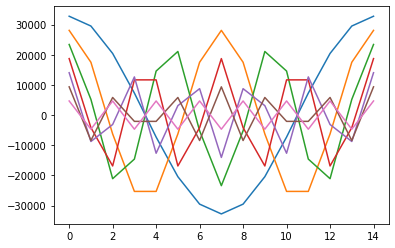

In [5]:
plt.plot(data);

Obviously, the returned samples have the `dtype` `'int16'` (as stored in the file).
To be able to do something useful, we'll have to convert it to floating point and normalize it to a range from -1 to 1.
Luckily, there is a function especially made for this:

In [6]:
np.set_printoptions(precision=4)
ewave.rescale(data, 'float32')

array([[ 1.    ,  0.8571,  0.7143,  0.5714,  0.4286,  0.2857,  0.1429],
       [ 0.9009,  0.5344,  0.1589, -0.1271, -0.2672, -0.2574, -0.1429],
       [ 0.6235, -0.1907, -0.6435, -0.5148, -0.0954,  0.1781,  0.1429],
       [ 0.2225, -0.7722, -0.4453,  0.3563,  0.3861, -0.0636, -0.1429],
       [-0.2225, -0.7722,  0.4453,  0.3563, -0.3861, -0.0636,  0.1429],
       [-0.6235, -0.1907,  0.6435, -0.5148,  0.0954,  0.1781, -0.1429],
       [-0.9009,  0.5344, -0.1589, -0.1271,  0.2672, -0.2574,  0.1429],
       [-1.    ,  0.8571, -0.7143,  0.5714, -0.4286,  0.2857, -0.1429],
       [-0.9009,  0.5344, -0.1589, -0.1271,  0.2672, -0.2574,  0.1429],
       [-0.6235, -0.1907,  0.6435, -0.5148,  0.0954,  0.1781, -0.1429],
       [-0.2225, -0.7722,  0.4453,  0.3563, -0.3861, -0.0636,  0.1429],
       [ 0.2225, -0.7722, -0.4453,  0.3563,  0.3861, -0.0636, -0.1429],
       [ 0.6235, -0.1907, -0.6435, -0.5148, -0.0954,  0.1781,  0.1429],
       [ 0.9009,  0.5344,  0.1589, -0.1271, -0.2672, -0.2574, -0

Note: until version 1.0.4 this was broken, but now it works (see https://github.com/melizalab/py-ewave/issues/4).

Files with floating point data can be used, WAVEX is supported:

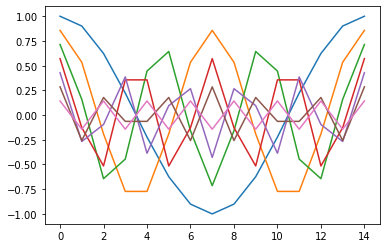

In [7]:
with ewave.open('data/test_wav_float32.wav') as w:
    data = w.read()
    
plt.plot(data);

Looking good!

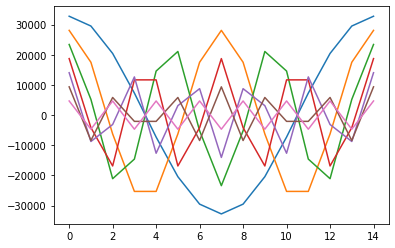

In [8]:
with ewave.open('data/test_wavex_pcm16.wav') as w:
    data = w.read()
    
plt.plot(data);

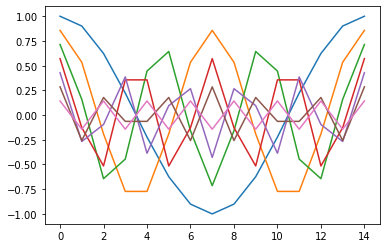

In [9]:
with ewave.open('data/test_wavex_float32.wav') as w:
    data = w.read()
    
plt.plot(data);

Opening a 24-bit PCM file fails with a not very verbose error message:

In [10]:
import traceback
try:
    ewave.open('data/test_wav_pcm24.wav')
except:
    traceback.print_exc()
else:
    print("It works (unexpectedly)!")

Traceback (most recent call last):
  File "<ipython-input-10-5697a06b57c7>", line 3, in <module>
    ewave.open('data/test_wav_pcm24.wav')
  File "/home/mg/.local/lib/python3.7/site-packages/ewave.py", line 91, in __init__
    self._load_header()
  File "/home/mg/.local/lib/python3.7/site-packages/ewave.py", line 271, in _load_header
    chunk.skip()
  File "/usr/lib/python3.7/chunk.py", line 160, in skip
    self.file.seek(n, 1)
  File "/usr/lib/python3.7/chunk.py", line 113, in seek
    raise RuntimeError
RuntimeError


## Writing

In [11]:
# TODO!

## Version Info

In [12]:
print("ewave:", ewave.__version__)

import numpy, IPython, sys
print("NumPy: {}; IPython: {}".format(numpy.__version__, IPython.__version__))

print("Python interpreter:")
print(sys.version)

ewave: 1.0.4
NumPy: 1.16.2; IPython: 7.5.0.dev
Python interpreter:
3.7.4 (default, Jul 11 2019, 10:43:21) 
[GCC 8.3.0]


<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>